Nama : Laura Natalia Nainggolan

> 


Asal : Makassar

> 

Email : lauranatalia231@gmail.com




In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# download dataset
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


--2020-08-18 03:28:47--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.94MB/s    in 71s     

2020-08-18 03:29:59 (4.35 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# install split_folders
!pip install split_folders
import splitfolders

In [ ]:
# extract zip file
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# see the contents of the folder in tmp
os.listdir('/tmp')

['rockpaperscissors.zip', 'rockpaperscissors', '__MACOSX']

In [ ]:
# see the contents of the folder in tmp/rockpaperscissors
os.listdir('/tmp/rockpaperscissors')

['paper', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'scissors']

In [ ]:
# dividing datasets into 60% training data and 40% validation data

import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output='/tmp/rockpaperscissors', seed=1337, ratio=(.6, .4))
base_dir = '/tmp/rockpaperscissors'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Copying files: 2188 files [00:00, 3318.36 files/s]


In [ ]:
os.listdir('/tmp/rockpaperscissors')

['val',
 'paper',
 'README_rpc-cv-images.txt',
 'train',
 'rock',
 'rps-cv-images',
 'scissors']

In [ ]:
os.listdir('/tmp/rockpaperscissors/val')

['paper', 'rock', 'scissors']

In [ ]:
os.listdir('/tmp/rockpaperscissors/train')

['paper', 'rock', 'scissors']

In [ ]:
# create a directory with paper image in the training data directory
train_paper_dir = os.path.join(train_dir, 'paper')
# create a directory with rock image in the training data directory
train_rock_dir = os.path.join(train_dir, 'rock')
# create a directory with scissors image in the training data directory
train_scissors_dir = os.path.join(train_dir, 'scissors')

# create a directory with paper image in the validation data directory
validation_paper_dir = os.path.join(validation_dir, 'paper')
# # create a directory with rock image in the validation data directory
validation_rock_dir = os.path.join(validation_dir, 'rock')
# # create a directory with scissors image in the validation data directory
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# padding 

model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPool2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
      tf.keras.layers.MaxPool2D(2, 2),
      tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
      tf.keras.layers.MaxPool2D(2, 2),
      tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
      tf.keras.layers.MaxPool2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# learning_rate Adam
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 256)       2

In [ ]:
# Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.960):
      print("\nReached 96% accuracy so cancelling training!")
      self.model.stop_training=True
    
callbacks = myCallback()

In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch=20, # berapa batch yang akan dieksekusi pada setiap epoch
            epochs=10,
            validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
            validation_steps=5, # berapa batch akan dieksekusi pada setiap epoch
            verbose=2,
            callbacks=[callbacks])

Epoch 1/10
20/20 - 42s - loss: 0.1166 - accuracy: 0.9531 - val_loss: 0.0653 - val_accuracy: 0.9875
Epoch 2/10
20/20 - 42s - loss: 0.1448 - accuracy: 0.9469 - val_loss: 0.2092 - val_accuracy: 0.9062
Epoch 3/10

Reached 96% accuracy so cancelling training!
20/20 - 42s - loss: 0.1114 - accuracy: 0.9656 - val_loss: 0.0778 - val_accuracy: 0.9812


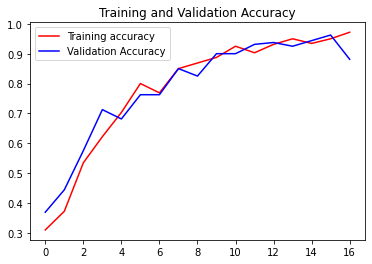

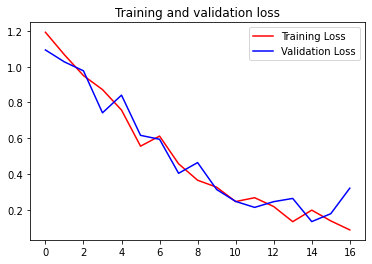

In [ ]:
# Plot Training and Validation Accuracy - Training and Validation Loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving images (1).jpg to images (1) (2).jpg
images (1).jpg
scissors


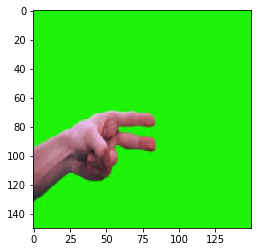

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  else:
    print('scissors')